In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [68]:
data = pd.read_csv("Occupancy_Estimation.csv")

In [69]:
df = pd.DataFrame(data)

In [70]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [71]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [72]:
df.shape

(10129, 19)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [74]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [75]:
df.isnull().sum()


Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [76]:
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [77]:
df = df.drop(columns=['Time'])

In [78]:
df = df.drop(columns=['Date'])

In [79]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [81]:
# Handling Inbalanced Data

In [82]:
target_value_count=df['Room_Occupancy_Count'].value_counts()

In [83]:
target_value_count

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [84]:
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'Room_Occupancy_Count')], df['Room_Occupancy_Count'])

In [85]:
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 10129
Resampled balanced dataset shape 32912


In [86]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'Room_Occupancy_Count'))

In [87]:
balanced_df['Room_Occupancy_Count'] = y_smote

In [88]:
balanced_df.shape

(32912, 17)

In [89]:
target_value_count=balanced_df['Room_Occupancy_Count'].value_counts()
target_value_count

Room_Occupancy_Count
1    8228
2    8228
3    8228
0    8228
Name: count, dtype: int64

In [90]:
balanced_df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [121]:
balanced_df.duplicated().sum()

1301

In [123]:
balanced_df.drop_duplicates(inplace = True)

In [125]:
balanced_df.duplicated().sum()

0

In [127]:

balanced_df.isnull().sum()

S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [129]:
df1=balanced_df.copy()
df1

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.750000,24.56,25.380000,121,34,53,40,0.080000,0.190000,0.060000,0.060000,390,0.769231,0,0,1
1,24.94,24.750000,24.56,25.440000,121,33,53,40,0.930000,0.050000,0.060000,0.060000,390,0.646154,0,0,1
2,25.00,24.750000,24.50,25.440000,121,34,53,40,0.430000,0.110000,0.080000,0.060000,390,0.519231,0,0,1
3,25.00,24.750000,24.56,25.440000,121,34,53,40,0.410000,0.100000,0.100000,0.090000,390,0.388462,0,0,1
4,25.00,24.750000,24.56,25.440000,121,34,54,40,0.180000,0.060000,0.060000,0.060000,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,26.19,27.223269,26.06,26.310000,163,252,272,74,0.651163,0.271574,0.125545,0.146828,962,1.999544,1,0,3
32908,25.63,26.250000,25.44,25.690000,10,10,38,34,0.295677,0.333533,0.545746,0.090000,375,0.279931,0,1,3
32909,26.25,26.310000,25.88,26.324524,150,234,186,10,0.129798,0.158674,0.088674,0.067925,1000,2.418145,0,0,3
32910,25.69,26.381133,25.56,25.750000,9,8,33,29,0.106042,0.058686,0.091322,0.090566,444,2.541945,0,0,3


In [131]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,31611.0,25.809828,0.383867,24.940000,25.500000,25.940000,26.130000,26.380000
S2_Temp,31611.0,26.066068,0.816466,24.750000,25.440000,25.880000,26.380000,29.000000
S3_Temp,31611.0,25.439455,0.442241,24.440000,25.112351,25.518487,25.810000,26.190000
S4_Temp,31611.0,26.051302,0.327850,24.940000,25.810000,26.190000,26.310000,26.560000
S1_Light,31611.0,96.868748,61.172371,0.000000,10.000000,119.000000,149.000000,165.000000
S2_Light,31611.0,90.400905,104.905984,0.000000,11.000000,27.000000,234.000000,258.000000
S3_Light,31611.0,93.832780,78.378851,0.000000,33.000000,68.000000,180.000000,280.000000
S4_Light,31611.0,26.616526,21.580418,0.000000,10.000000,21.000000,45.000000,74.000000
S1_Sound,31611.0,0.423166,0.445107,0.060000,0.081278,0.273685,0.614526,3.880000
S2_Sound,31611.0,0.295289,0.389817,0.040000,0.059061,0.146666,0.381167,3.440000


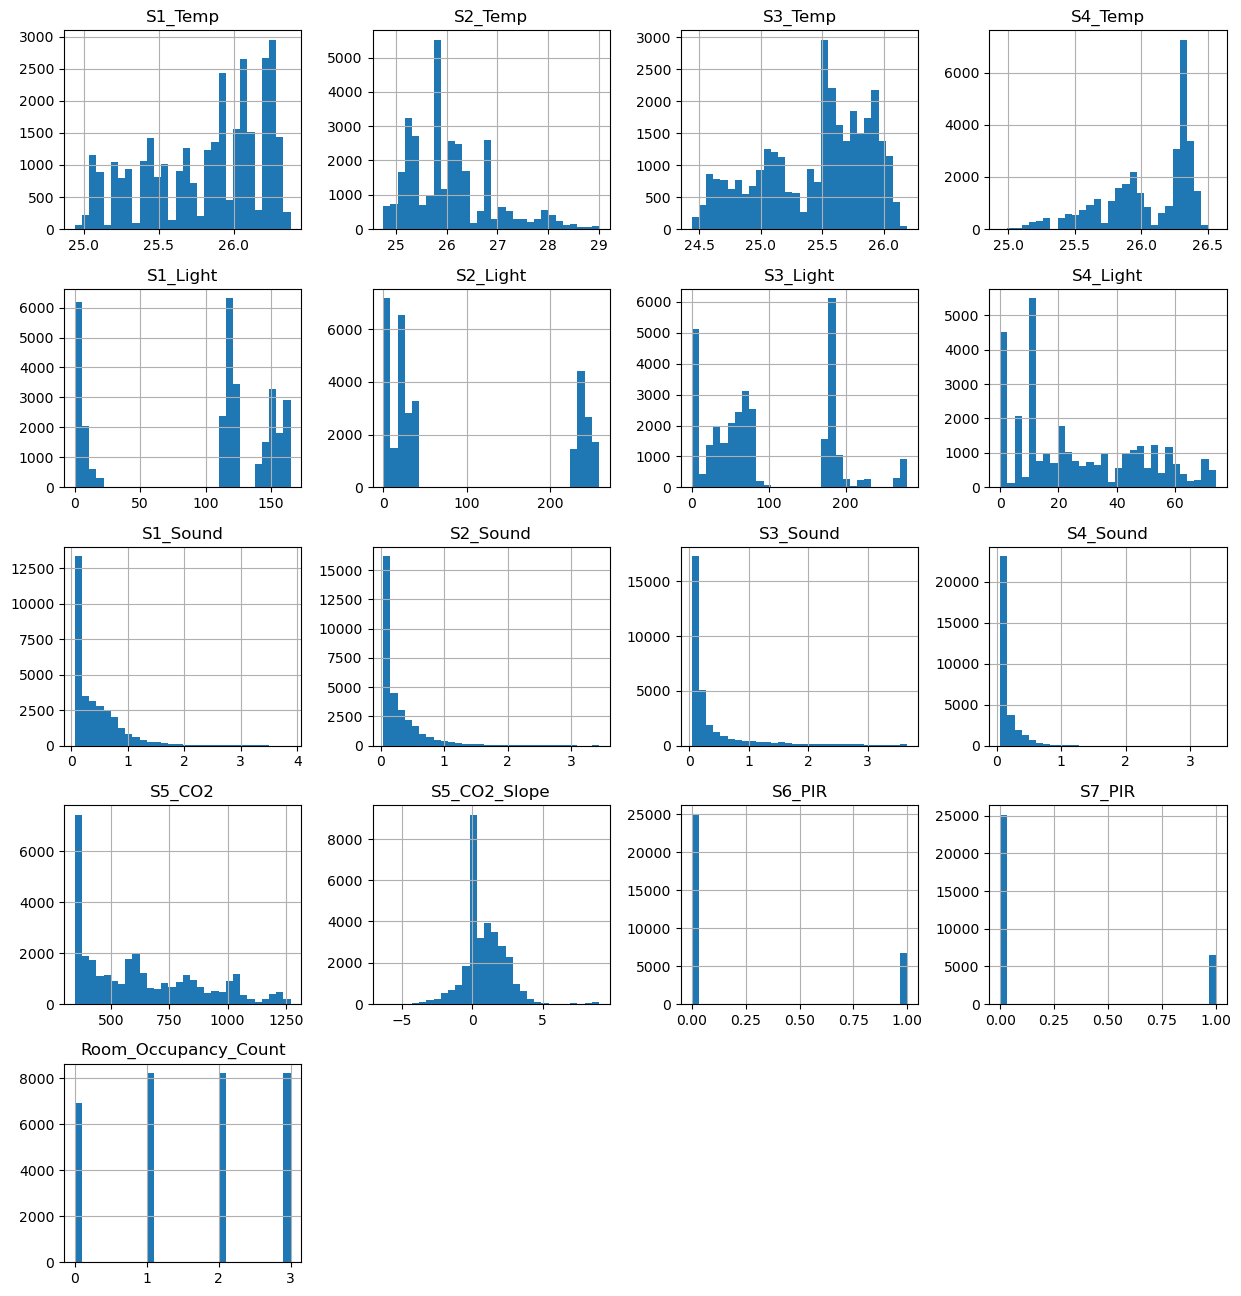

In [133]:
df1.hist(figsize=(15, 16), bins=30)
plt.show()

In [135]:
numerical_features = df1.select_dtypes(include = 'number')
print(numerical_features)

       S1_Temp    S2_Temp  S3_Temp    S4_Temp  S1_Light  S2_Light  S3_Light  \
0        24.94  24.750000    24.56  25.380000       121        34        53   
1        24.94  24.750000    24.56  25.440000       121        33        53   
2        25.00  24.750000    24.50  25.440000       121        34        53   
3        25.00  24.750000    24.56  25.440000       121        34        53   
4        25.00  24.750000    24.56  25.440000       121        34        54   
...        ...        ...      ...        ...       ...       ...       ...   
32907    26.19  27.223269    26.06  26.310000       163       252       272   
32908    25.63  26.250000    25.44  25.690000        10        10        38   
32909    26.25  26.310000    25.88  26.324524       150       234       186   
32910    25.69  26.381133    25.56  25.750000         9         8        33   
32911    26.25  26.380000    25.94  26.380000       150       235       186   

       S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_S

In [137]:
# Handling Outliers

Text(0.5, 1.0, 'Box Plot of Credit Card Usage')

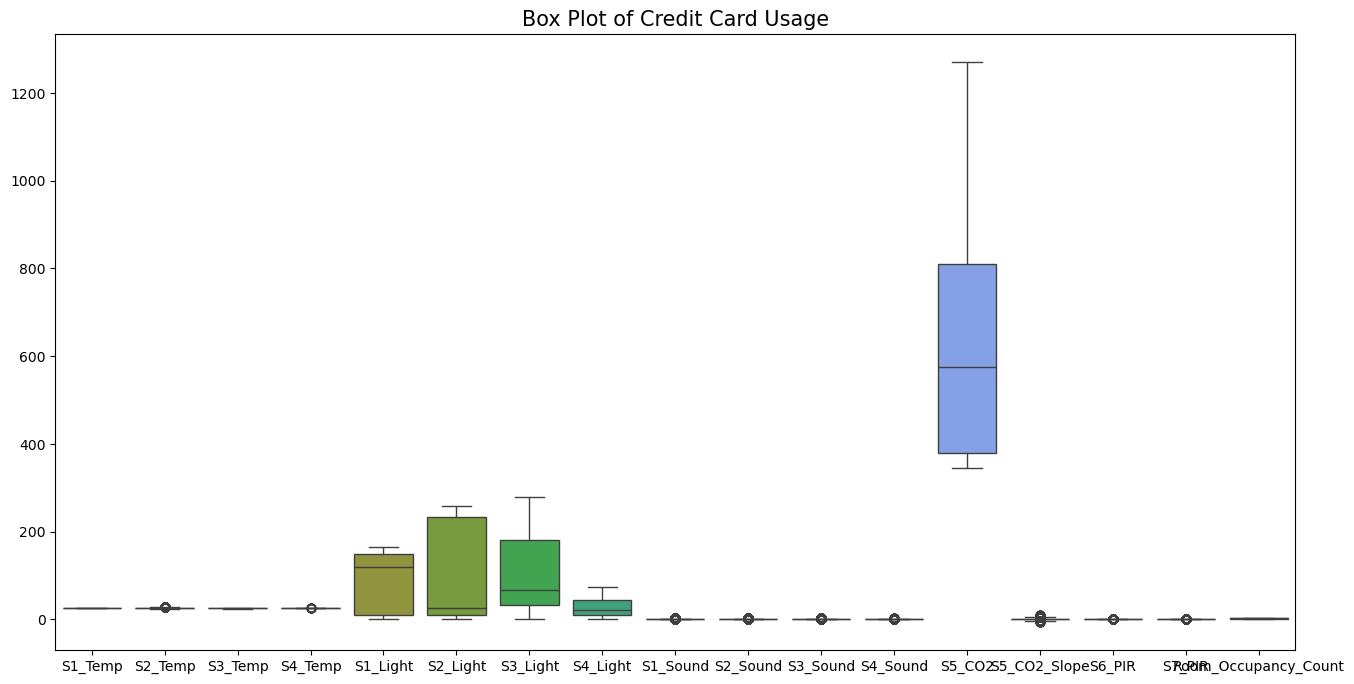

In [140]:
plt.figure(figsize = (16,8))
sns.boxplot(df1[numerical_features.columns])
plt.title("Box Plot of Credit Card Usage", fontsize=15)

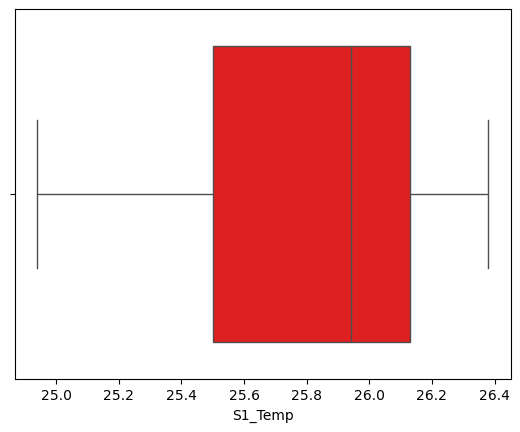

<Figure size 500x500 with 0 Axes>

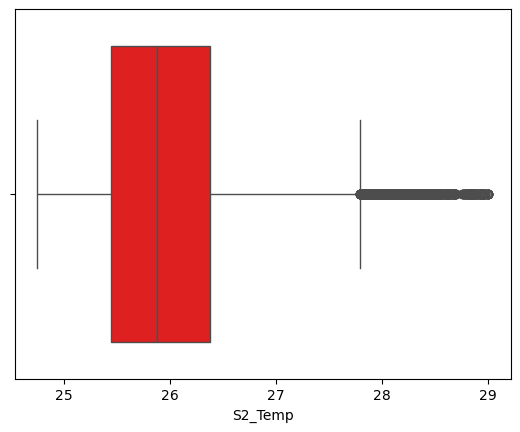

<Figure size 500x500 with 0 Axes>

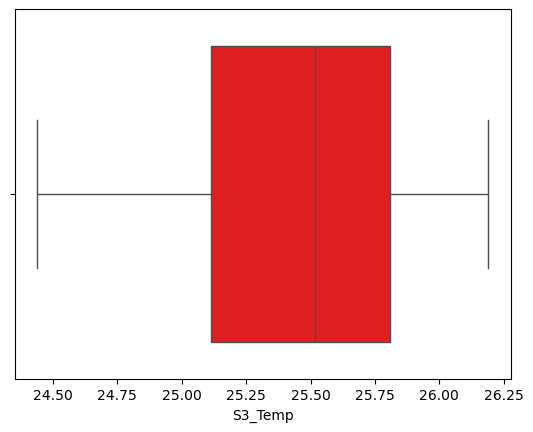

<Figure size 500x500 with 0 Axes>

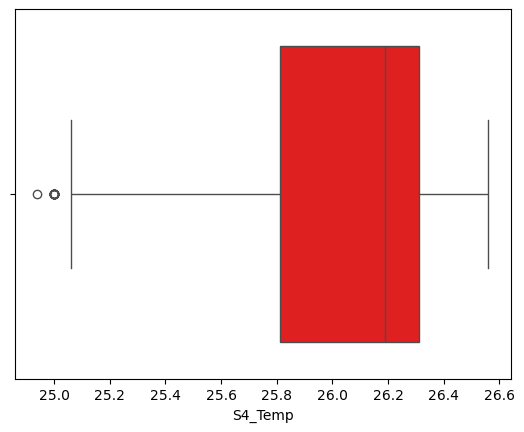

<Figure size 500x500 with 0 Axes>

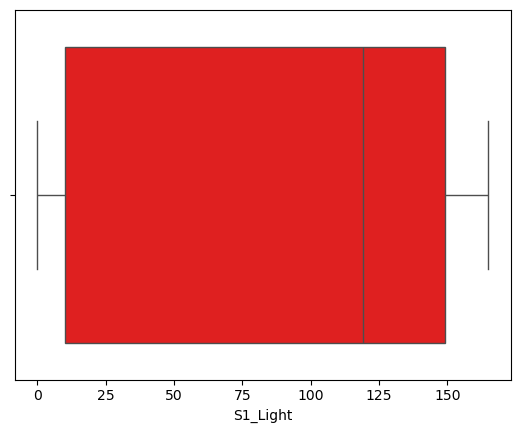

<Figure size 500x500 with 0 Axes>

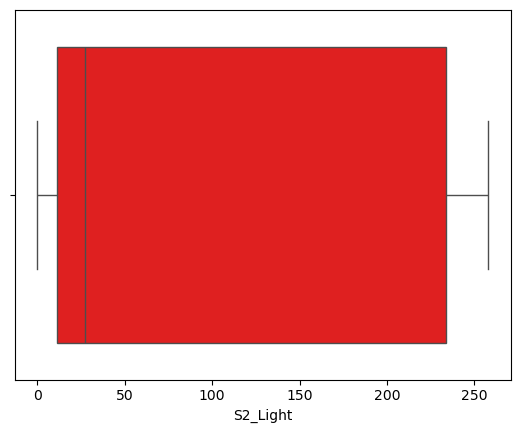

<Figure size 500x500 with 0 Axes>

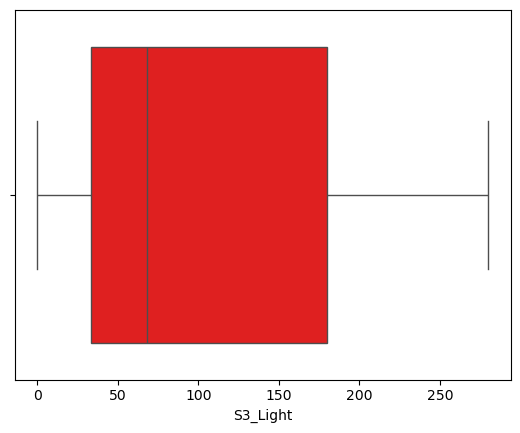

<Figure size 500x500 with 0 Axes>

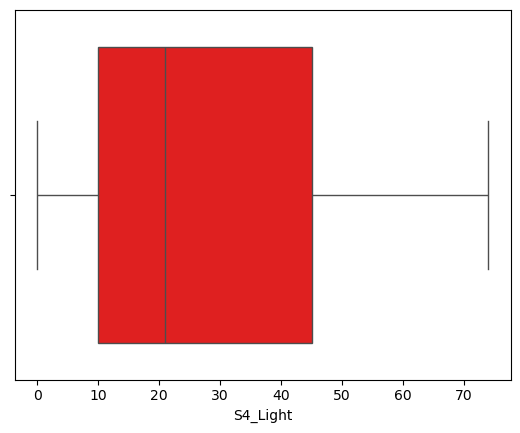

<Figure size 500x500 with 0 Axes>

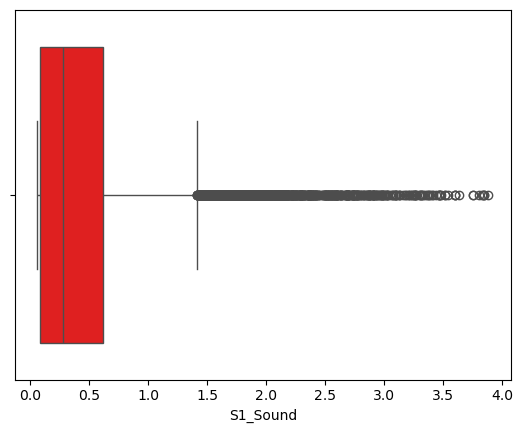

<Figure size 500x500 with 0 Axes>

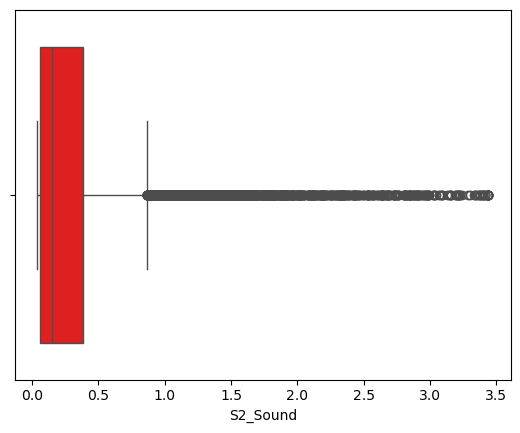

<Figure size 500x500 with 0 Axes>

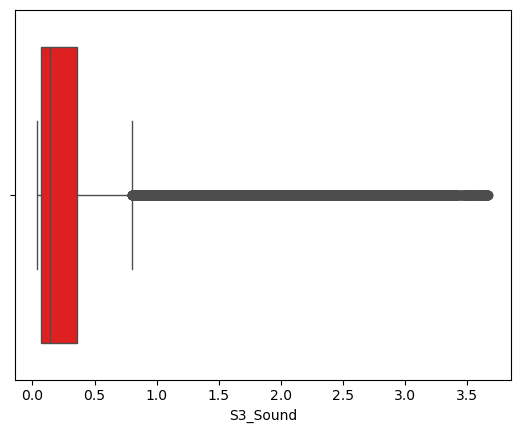

<Figure size 500x500 with 0 Axes>

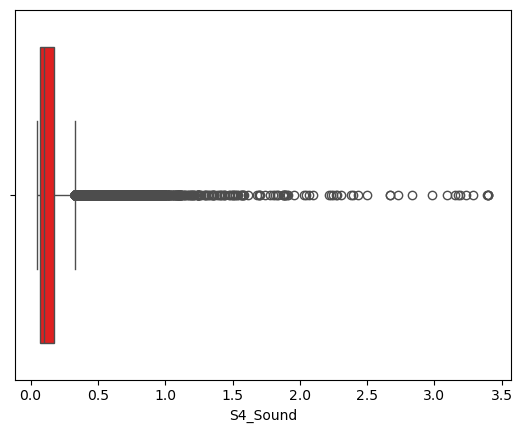

<Figure size 500x500 with 0 Axes>

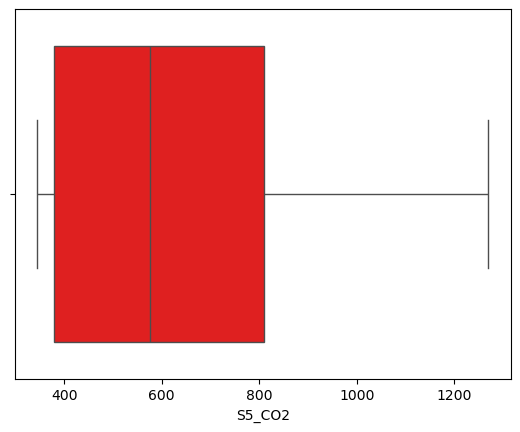

<Figure size 500x500 with 0 Axes>

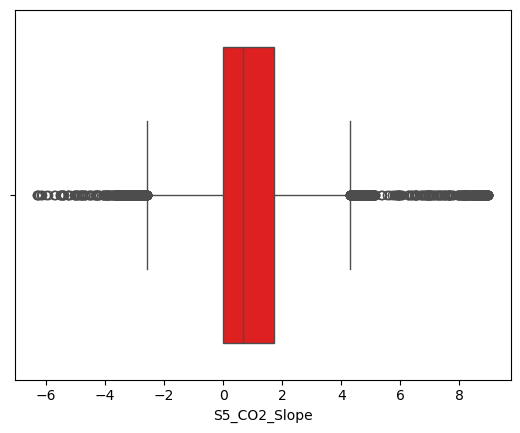

<Figure size 500x500 with 0 Axes>

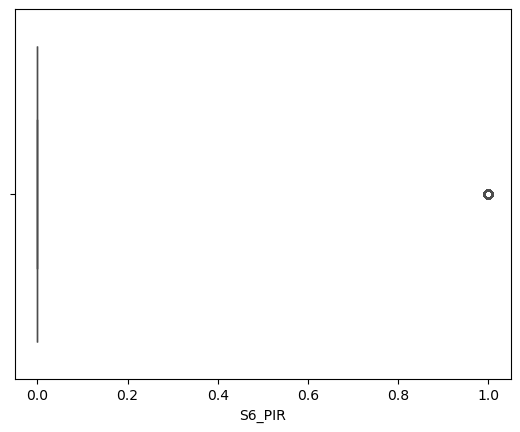

<Figure size 500x500 with 0 Axes>

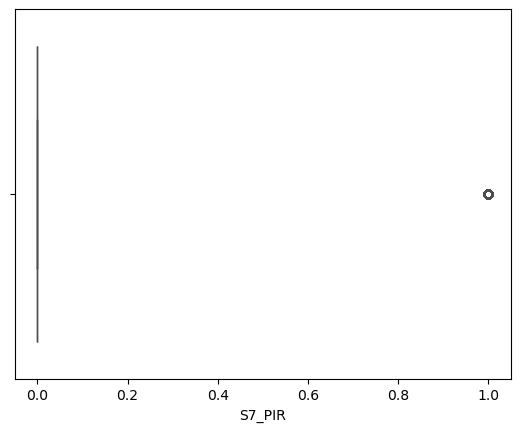

<Figure size 500x500 with 0 Axes>

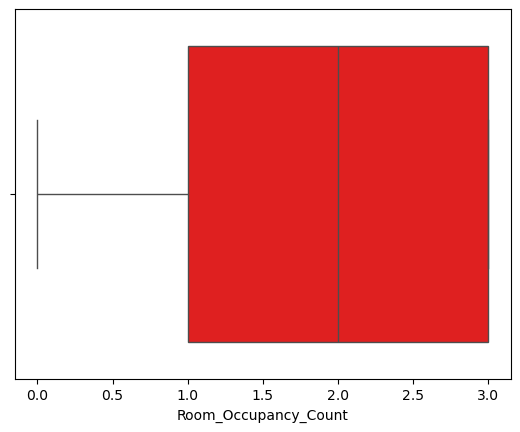

<Figure size 500x500 with 0 Axes>

In [142]:
for i in numerical_features.columns:
    sns.boxplot(x=i,data=df1,color ='red')
    plt.figure(figsize=(5, 5))
    plt.show()

In [144]:
def remove_outliers(df):
    for col in df1.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 =df[col].quantile(0.75)

        IQR =Q3-Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5* IQR)

        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x >upper else x)
    return df

In [146]:

df2 = remove_outliers(df1)

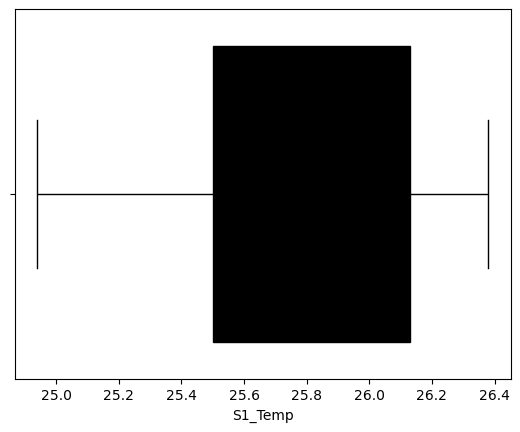

<Figure size 600x600 with 0 Axes>

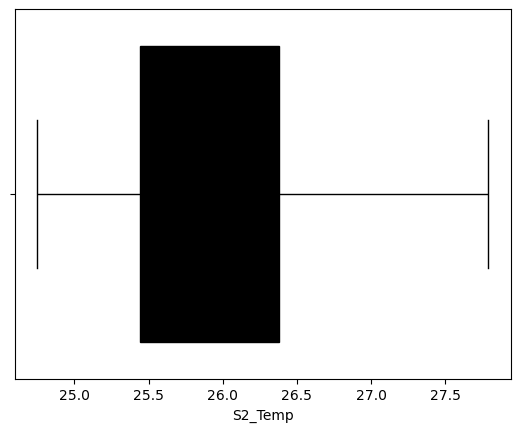

<Figure size 600x600 with 0 Axes>

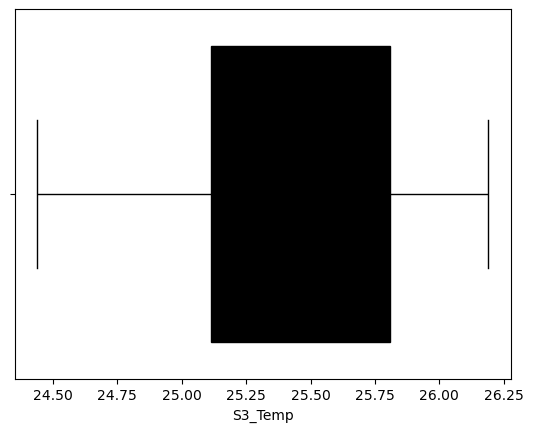

<Figure size 600x600 with 0 Axes>

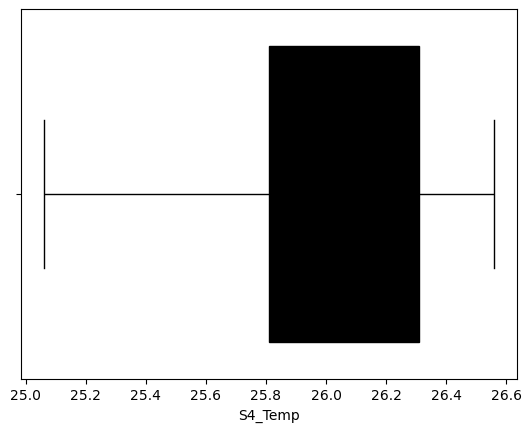

<Figure size 600x600 with 0 Axes>

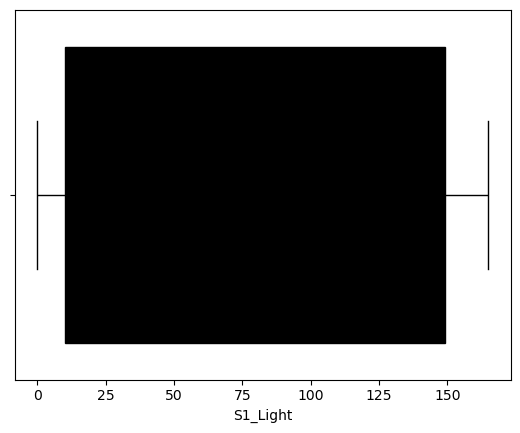

<Figure size 600x600 with 0 Axes>

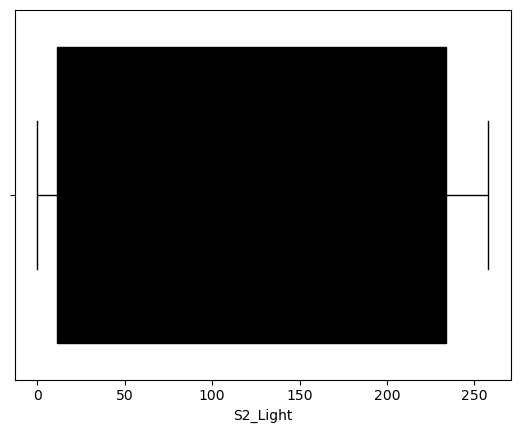

<Figure size 600x600 with 0 Axes>

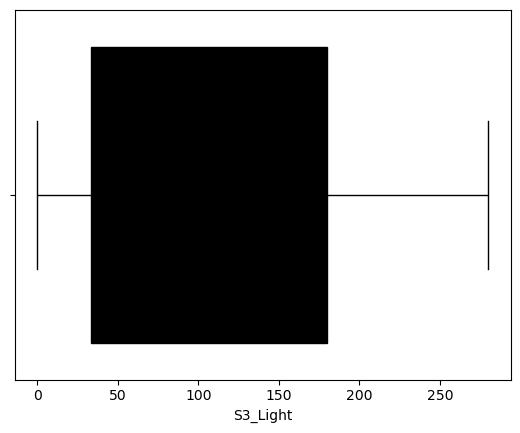

<Figure size 600x600 with 0 Axes>

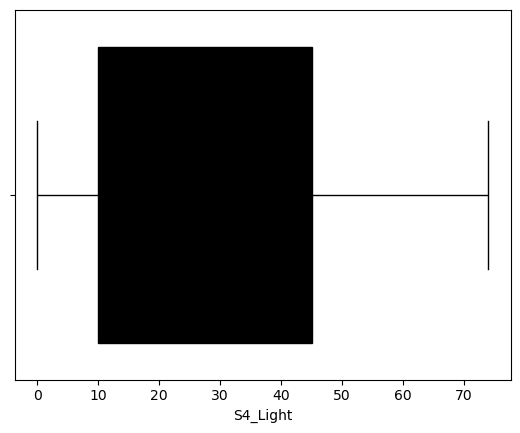

<Figure size 600x600 with 0 Axes>

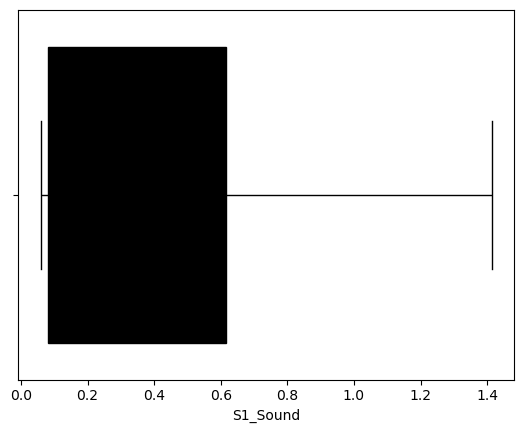

<Figure size 600x600 with 0 Axes>

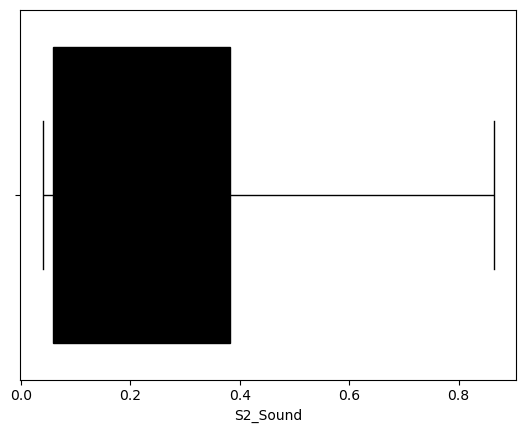

<Figure size 600x600 with 0 Axes>

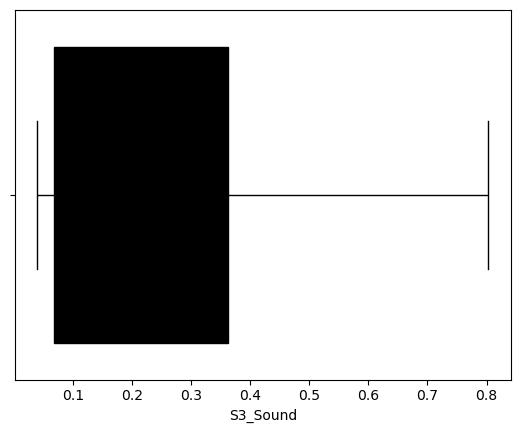

<Figure size 600x600 with 0 Axes>

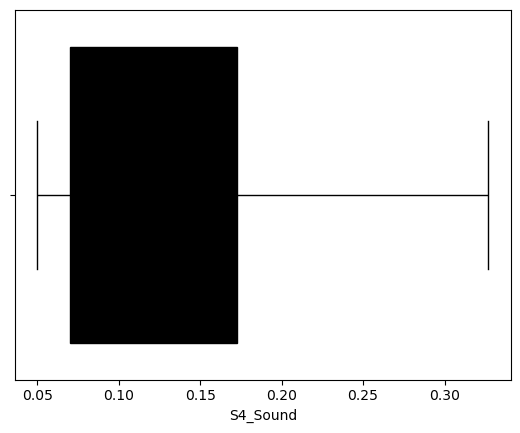

<Figure size 600x600 with 0 Axes>

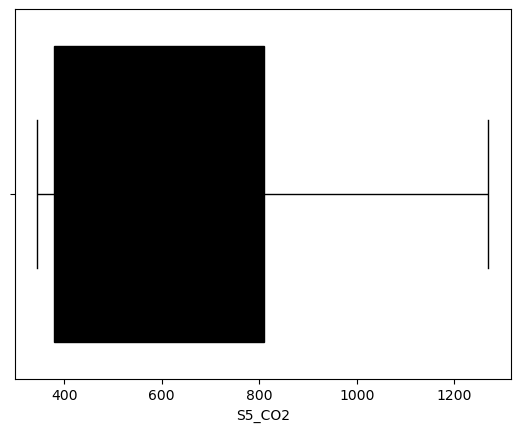

<Figure size 600x600 with 0 Axes>

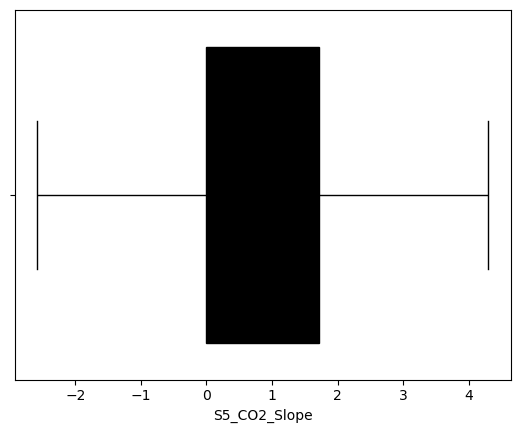

<Figure size 600x600 with 0 Axes>

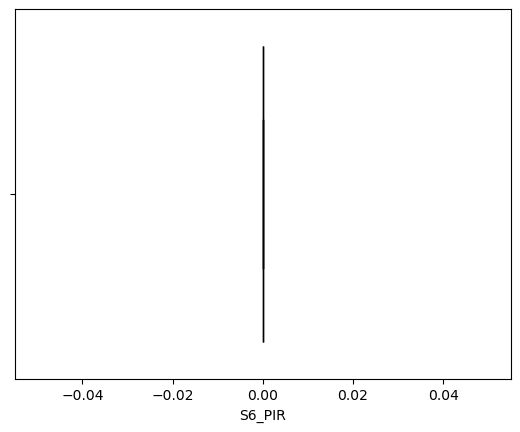

<Figure size 600x600 with 0 Axes>

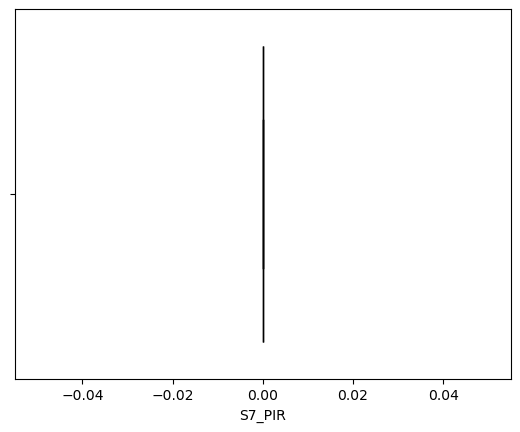

<Figure size 600x600 with 0 Axes>

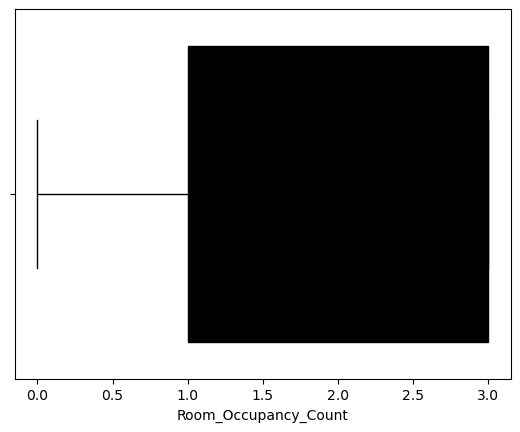

<Figure size 600x600 with 0 Axes>

In [148]:
for i in numerical_features.columns:
    sns.boxplot(x=i,data=df2,color ='black')
    plt.figure(figsize=(6, 6))
    plt.show()

In [150]:
df3 = df2[numerical_features.columns]
df3

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.750000,24.56,25.380000,121,34,53,40,0.080000,0.190000,0.060000,0.060000,390,0.769231,0.0,0.0,1
1,24.94,24.750000,24.56,25.440000,121,33,53,40,0.930000,0.050000,0.060000,0.060000,390,0.646154,0.0,0.0,1
2,25.00,24.750000,24.50,25.440000,121,34,53,40,0.430000,0.110000,0.080000,0.060000,390,0.519231,0.0,0.0,1
3,25.00,24.750000,24.56,25.440000,121,34,53,40,0.410000,0.100000,0.100000,0.090000,390,0.388462,0.0,0.0,1
4,25.00,24.750000,24.56,25.440000,121,34,54,40,0.180000,0.060000,0.060000,0.060000,390,0.253846,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,26.19,27.223269,26.06,26.310000,163,252,272,74,0.651163,0.271574,0.125545,0.146828,962,1.999544,0.0,0.0,3
32908,25.63,26.250000,25.44,25.690000,10,10,38,34,0.295677,0.333533,0.545746,0.090000,375,0.279931,0.0,0.0,3
32909,26.25,26.310000,25.88,26.324524,150,234,186,10,0.129798,0.158674,0.088674,0.067925,1000,2.418145,0.0,0.0,3
32910,25.69,26.381133,25.56,25.750000,9,8,33,29,0.106042,0.058686,0.091322,0.090566,444,2.541945,0.0,0.0,3


In [152]:
df3 = df2[numerical_features.columns]
df3

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.750000,24.56,25.380000,121,34,53,40,0.080000,0.190000,0.060000,0.060000,390,0.769231,0.0,0.0,1
1,24.94,24.750000,24.56,25.440000,121,33,53,40,0.930000,0.050000,0.060000,0.060000,390,0.646154,0.0,0.0,1
2,25.00,24.750000,24.50,25.440000,121,34,53,40,0.430000,0.110000,0.080000,0.060000,390,0.519231,0.0,0.0,1
3,25.00,24.750000,24.56,25.440000,121,34,53,40,0.410000,0.100000,0.100000,0.090000,390,0.388462,0.0,0.0,1
4,25.00,24.750000,24.56,25.440000,121,34,54,40,0.180000,0.060000,0.060000,0.060000,390,0.253846,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,26.19,27.223269,26.06,26.310000,163,252,272,74,0.651163,0.271574,0.125545,0.146828,962,1.999544,0.0,0.0,3
32908,25.63,26.250000,25.44,25.690000,10,10,38,34,0.295677,0.333533,0.545746,0.090000,375,0.279931,0.0,0.0,3
32909,26.25,26.310000,25.88,26.324524,150,234,186,10,0.129798,0.158674,0.088674,0.067925,1000,2.418145,0.0,0.0,3
32910,25.69,26.381133,25.56,25.750000,9,8,33,29,0.106042,0.058686,0.091322,0.090566,444,2.541945,0.0,0.0,3


In [154]:
pt = PowerTransformer(method='yeo-johnson')

In [156]:
numerical_features = df3.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

In [158]:
df3[numerical_features] = pt.fit_transform(df3[numerical_features])
df3[numerical_features]

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,-1.832447,-3.316791e-15,-1.717583,-1.663657,0.463652,-0.033721,-0.223968,0.740134,-1.101632,0.090843,-1.040512,-1.217776,-1.002752,-0.029853,0.0,0.0,-0.462551
1,-1.832447,-3.316791e-15,-1.717583,-1.588151,0.463652,-0.050340,-0.223968,0.740134,1.383403,-1.080691,-1.040512,-1.217776,-1.002752,-0.121061,0.0,0.0,-0.462551
2,-1.752958,-3.316791e-15,-1.795796,-1.588151,0.463652,-0.033721,-0.223968,0.740134,0.466329,-0.492407,-0.807353,-1.217776,-1.002752,-0.215647,0.0,0.0,-0.462551
3,-1.752958,-3.316791e-15,-1.717583,-1.588151,0.463652,-0.033721,-0.223968,0.740134,0.407559,-0.580057,-0.596509,-0.411372,-1.002752,-0.313710,0.0,0.0,-0.462551
4,-1.752958,-3.316791e-15,-1.717583,-1.588151,0.463652,-0.033721,-0.209259,0.740134,-0.505156,-0.971481,-1.040512,-1.217776,-1.002752,-0.415371,0.0,0.0,-0.462551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,1.054378,2.220446e-15,1.640569,0.816363,0.957484,1.279671,1.644107,1.656387,0.977316,0.521426,-0.355754,0.567268,1.275637,0.860565,0.0,0.0,1.267917
32908,-0.615643,6.245005e-16,-0.139644,-1.185831,-1.327769,-0.646559,-0.466505,0.537073,0.016106,0.770690,1.341219,-0.411372,-1.125393,-0.395612,0.0,0.0,1.267917
32909,1.284111,7.494005e-16,1.050746,0.889464,0.809547,1.223705,1.085600,-0.592203,-0.784274,-0.114949,-0.713320,-0.978896,1.353334,1.156727,0.0,0.0,1.267917
32910,-0.471959,8.743006e-16,0.152982,-1.063927,-1.355110,-0.742870,-0.559049,0.352156,-0.930177,-0.985553,-0.685423,-0.398491,-0.612995,1.243791,0.0,0.0,1.267917


In [160]:
df3[numerical_features].skew()

S1_Temp                -0.147184
S2_Temp                 0.000000
S3_Temp                -0.110466
S4_Temp                -0.242976
S1_Light               -0.848919
S2_Light               -0.095659
S3_Light               -0.293963
S4_Light               -0.213881
S1_Sound                0.243975
S2_Sound                0.363358
S3_Sound                0.469374
S4_Sound                0.406314
S5_CO2                  0.084793
S5_CO2_Slope           -0.009470
S6_PIR                  0.000000
S7_PIR                  0.000000
Room_Occupancy_Count   -0.176076
dtype: float64

Text(0.5, 1.0, 'Credit Card Usage')

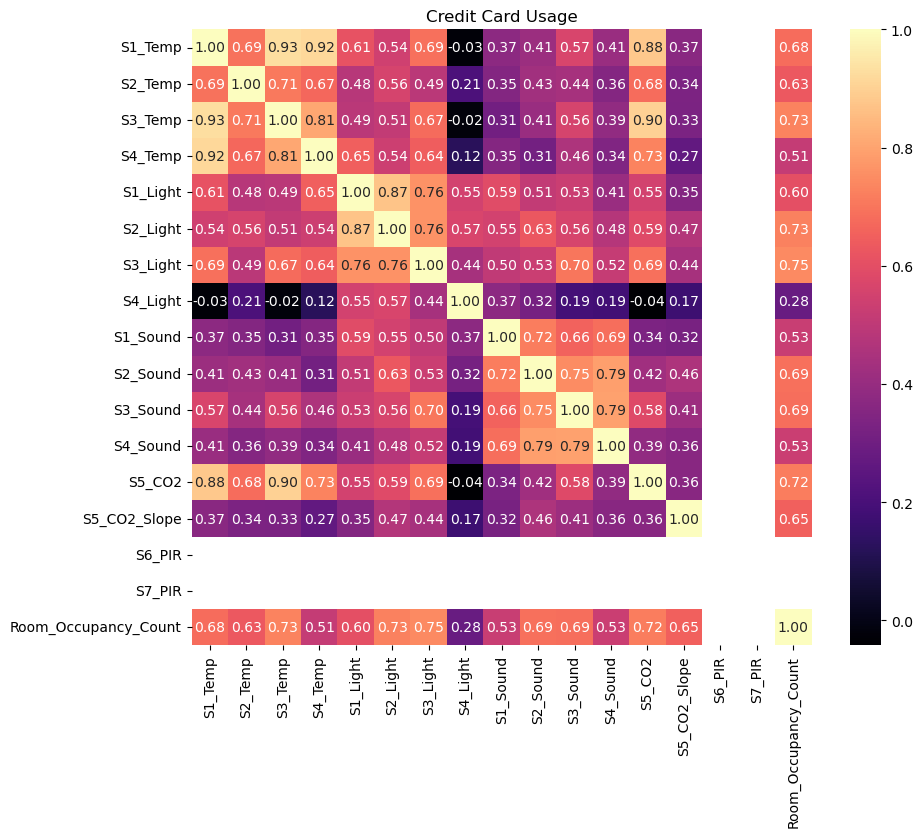

In [162]:
corr=df3.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='magma') 
plt.title("Credit Card Usage")

In [164]:
#  Feature Selection

In [166]:
x = df3.drop(columns = ['Room_Occupancy_Count'])
y = df3['Room_Occupancy_Count']

In [168]:

sk = SelectKBest(score_func=f_classif,k=10)

In [170]:
x_new = sk.fit_transform(x,y)

In [172]:
selected_features = x.columns[sk.get_support()]

In [174]:
feature_score = pd.DataFrame({'Feature':x.columns,'score':sk.scores_}).sort_values(by='score',ascending =False)

In [176]:
print(selected_features )
print("/nfeature scores:")
print(feature_score)

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light',
       'S2_Sound', 'S3_Sound', 'S5_CO2', 'S5_CO2_Slope'],
      dtype='object')
/nfeature scores:
         Feature         score
4       S1_Light  26495.644071
6       S3_Light  15916.354154
5       S2_Light  14546.699315
9       S2_Sound  12147.578710
12        S5_CO2  12056.520327
2        S3_Temp  11909.620708
10      S3_Sound  11615.343384
0        S1_Temp   9812.110857
13  S5_CO2_Slope   7948.071362
1        S2_Temp   6976.279336
8       S1_Sound   6746.927445
11      S4_Sound   5971.824369
7       S4_Light   5183.123695
3        S4_Temp   5016.932062
14        S6_PIR           NaN
15        S7_PIR           NaN


In [178]:
x_selected = x[selected_features]


In [180]:
x_selected.head()

,S1_Temp,S2_Temp,S3_Temp,S1_Light,S2_Light,S3_Light,S2_Sound,S3_Sound,S5_CO2,S5_CO2_Slope
0,-1.832447,-3.316791e-15,-1.717583,0.463652,-0.033721,-0.223968,0.090843,-1.040512,-1.002752,-0.029853
1,-1.832447,-3.316791e-15,-1.717583,0.463652,-0.050340,-0.223968,-1.080691,-1.040512,-1.002752,-0.121061
2,-1.752958,-3.316791e-15,-1.795796,0.463652,-0.033721,-0.223968,-0.492407,-0.807353,-1.002752,-0.215647
3,-1.752958,-3.316791e-15,-1.717583,0.463652,-0.033721,-0.223968,-0.580057,-0.596509,-1.002752,-0.313710
4,-1.752958,-3.316791e-15,-1.717583,0.463652,-0.033721,-0.209259,-0.971481,-1.040512,-1.002752,-0.415371


In [182]:
# Scalling

In [185]:
scaler= StandardScaler()

In [189]:
x_scaled=scaler.fit_transform(x_selected)

In [191]:
x_scaled

array([[-1.83244658, -2.1797485 , -1.71758322, ..., -1.04051221,
        -1.00275192, -0.02985294],
       [-1.83244658, -2.1797485 , -1.71758322, ..., -1.04051221,
        -1.00275192, -0.12106107],
       [-1.75295756, -2.1797485 , -1.7957963 , ..., -0.80735259,
        -1.00275192, -0.21564706],
       ...,
       [ 1.28411082,  0.49643766,  1.05074591, ..., -0.71331956,
         1.353334  ,  1.15672725],
       [-0.47195932,  0.57864133,  0.15298226, ..., -0.68542286,
        -0.61299476,  1.24379101],
       [ 1.28411082,  0.57864133,  1.24005417, ...,  1.16907823,
         1.4491832 ,  0.94529898]])

In [193]:
#  Train Test Split

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [197]:
print(f"x_train:{x_train.shape}\nx_test:{x_test.shape}\ny_train:{y_train.shape}\ny_test:{y_test.shape}\n")

x_train:(25288, 10)
x_test:(6323, 10)
y_train:(25288,)
y_test:(6323,)

